# stım hastalığı karar destek modeli.

In [1]:
import pandas as pd

# Veriyi yükleyelim
file_path = r'C:\Users\realb\Desktop\astım hastalığı tahmin modeli/processed-data.csv'
data = pd.read_csv(file_path)

In [2]:
# İlk birkaç satırı görüntüleyelim
data.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Özellikler ve hedef değişken
X = data.drop(columns=['Difficulty-in-Breathing'])
y = data['Difficulty-in-Breathing']

# Eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelini oluşturalım ve eğitelim
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Modelin performansını değerlendirelim
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.641445707070707,
 '              precision    recall  f1-score   support\n\n           0       0.63      0.68      0.65     31698\n           1       0.65      0.60      0.63     31662\n\n    accuracy                           0.64     63360\n   macro avg       0.64      0.64      0.64     63360\nweighted avg       0.64      0.64      0.64     63360\n')

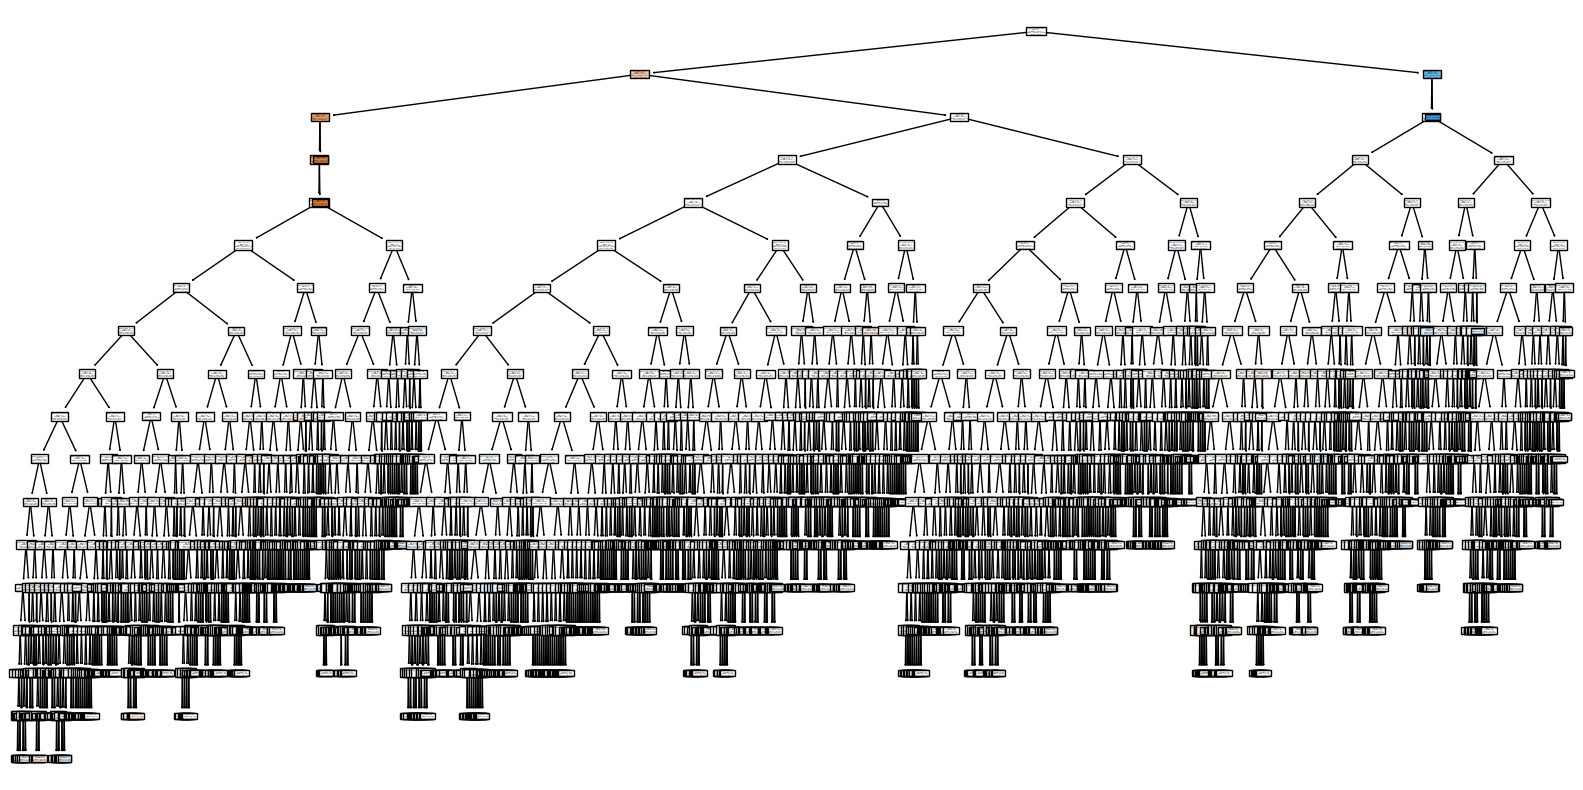

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

# Karar ağacını görselleştirelim
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X.columns), class_names=['No Difficulty', 'Difficulty'])
plt.show()

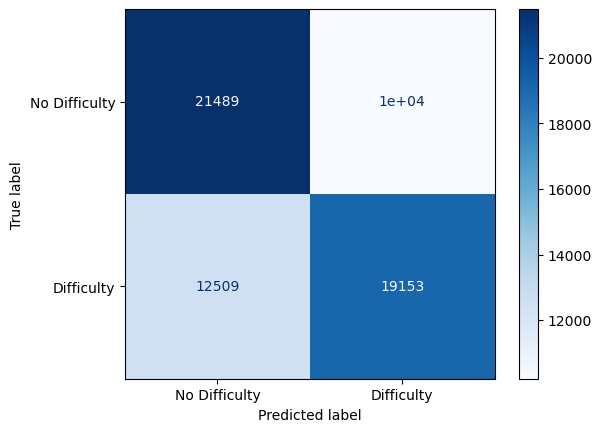

In [13]:
# Hata matrisini görselleştirelim
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['No Difficulty', 'Difficulty'], cmap=plt.cm.Blues)
plt.show()